#### Librerias

In [1711]:
import numpy as np
import matplotlib.pyplot as plt

#### Función objetivo

In [1712]:
# función objetivo a maximizar
def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]  # funcion objetivo

#### Restricciones

In [1713]:
# primera restriccion
def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640  # restricción de 640 horas fabricacion.

# segunda restriccion
def g2(x):
    return 3.5 * x[0] + 3 * x[1] + 3 * x[2] + 2 * x[3] <= 960  # restriccion: de 960 horas acabados.
# segunda restriccion punto e
#def g2(x):
#    return 3.5 * x[0] + 2 * x[1] + 3 * x[2] + 2 * x[3] <= 960  # restriccion: de 960 horas acabados.

#### Parametros

In [1714]:
# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 4  # dimensiones del espacio de busqueda (x1, x2, x3 y x4)
max_iterations = 50  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.4944  # coeficientes de aceleracion

w = 0.8 # Factor de inercia
w_dinamico = False # True

factor_contruccion = False #True
phi = 4.1
chi = 2 / abs(2 - phi - np.sqrt(phi ** 2 - 4 * phi))

#### Inicialización de las particulas

In [1715]:
# inicialización de particulas
x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = np.zeros(n_dimensions)  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)

#### Inicialización de particulas factibles

In [1716]:
# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

#### Aplicamos la optimización

In [1717]:
# Optimizacion

#lista para guardar los gbest
gbest_list = []
gbest_fit_list = []

for i in range(max_iterations):  # Repetir hasta el número máximo de iteraciones

    # w_dinamico
    if w_dinamico:
        w_max = 0.9
        w_min = 0.4
        t_max = max_iterations
        w = w_max - ((w_max - w_min) / t_max) * (i + 1)
        #print("w_dinamico:" , w)

    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global

        if factor_contruccion:
            # actualizacion de la velocidad de la particula
            v[i] = chi * (v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i]))
            x[i] += v[i]  # Se actualiza la posicion de la particula
        else:
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i]) and g2(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()

    gbest_list.append(gbest)
    gbest_fit_list.append(gbest_fit)

In [1718]:
# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}, {gbest[2]:.4f}, {gbest[3]:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [78.1978, 64.3460, 65.0094, 84.5975]
Valor optimo: 105392.97675409226


#### Punto d, grafico de gbest a través de las iteraciones

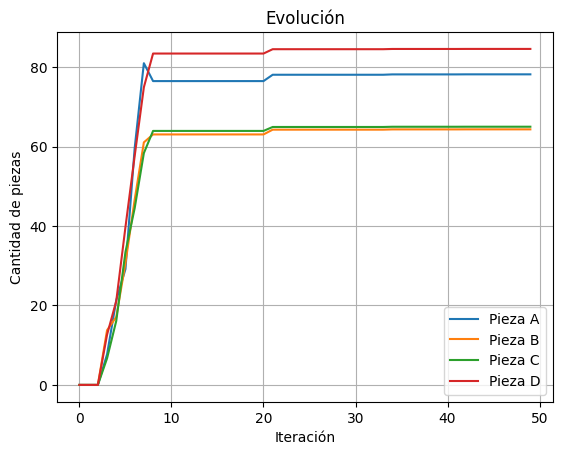

In [1719]:
# Grafico de la pieza A:
plt.plot(range(50), [array[0] for array in gbest_list], label="Pieza A")
plt.plot(range(50), [array[1] for array in gbest_list], label="Pieza B")
plt.plot(range(50), [array[2] for array in gbest_list], label="Pieza C")
plt.plot(range(50), [array[3] for array in gbest_list], label="Pieza D")
plt.ylabel("Cantidad de piezas")
plt.xlabel("Iteración")
plt.title("Evolución")
plt.legend()
plt.grid()

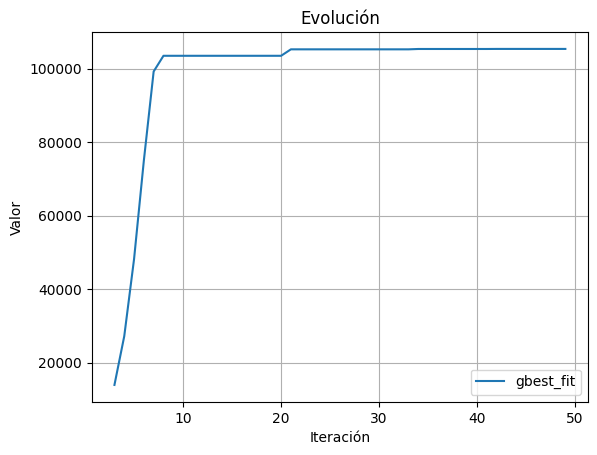

In [1720]:
# Grafico de la pieza A:
plt.plot(range(50), gbest_fit_list, label="gbest_fit")
plt.ylabel("Valor")
plt.xlabel("Iteración")
plt.title("Evolución")
plt.legend()
plt.grid()

#### Punto f: Graficar los boxplots.  
- Para este ejercicio se fue ejecutando el codigo caso por caso y se fue almacenando los valores obtenidos.

In [1721]:
print([array[0] for array in gbest_list])
print([array[1] for array in gbest_list])
print([array[2] for array in gbest_list])
print([array[3] for array in gbest_list])
print(gbest_fit_list)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(7.685075648624378), np.float64(21.314357266725235), np.float64(29.167119559781447), np.float64(59.58184242035331), np.float64(81.00203504491128), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09

In [1728]:
# w=0.8
w_08_A = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(7.685075648624378), np.float64(21.314357266725235), np.float64(29.167119559781447), np.float64(59.58184242035331), np.float64(81.00203504491128), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(76.49774837052465), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.09521114727367), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.18303259217242), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741), np.float64(78.19776658567741)]
w_08_B = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(13.768476563978709), np.float64(17.11427427978181), np.float64(30.670640255883775), np.float64(46.619893993964936), np.float64(61.07215539696948), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(63.067186465886365), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.26881697932022), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.33487731541076), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687), np.float64(64.345960400687)]
w_08_C = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.692252670236668), np.float64(16.11543337622927), np.float64(33.47372819147518), np.float64(44.48148943110131), np.float64(58.369106476519775), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(63.95238423030795), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(64.94566069101714), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00026664192444), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702), np.float64(65.00942800025702)]
w_08_D = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(12.640050576471916), np.float64(21.110023703475868), np.float64(39.74829078990102), np.float64(57.614748053709604), np.float64(74.94616738353466), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(83.43468308201501), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.52737891467591), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.58745050335756), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453), np.float64(84.5975288435453)]
w_08_fit = [float('-inf'), float('-inf'), float('-inf'), np.float64(13955.070879044077), np.float64(27214.89795930052), np.float64(48190.31130295462), np.float64(75017.1623532016), np.float64(99253.435852004), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(103523.78642811665), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105280.2158250435), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105376.77655230794), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226), np.float64(105392.97675409226)]
# w dinamico:
w_DINAMICO_A = [np.float64(0.0), np.float64(8.923411879978945), np.float64(8.927537369561191), np.float64(18.17562945425087), np.float64(33.383126324803854), np.float64(51.94392057118519), np.float64(74.26223702360002), np.float64(102.06368100889074), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(117.74327600764381), np.float64(118.32924322212362), np.float64(118.32924322212362), np.float64(118.32924322212362), np.float64(118.50544121964884), np.float64(118.50544121964884), np.float64(118.50544121964884), np.float64(118.55161919084026), np.float64(118.55161919084026), np.float64(118.56908369954485), np.float64(118.56908369954485), np.float64(118.57526613562628), np.float64(118.57526613562628), np.float64(118.5773100489948), np.float64(118.5773100489948), np.float64(118.57793957431231), np.float64(118.57827951798376), np.float64(118.57827951798376), np.float64(118.57827951798376), np.float64(118.57827951798376), np.float64(118.5783034085451), np.float64(118.5783034085451), np.float64(118.5783034085451), np.float64(118.5783034085451), np.float64(118.57830462338588), np.float64(118.57830517006423), np.float64(118.5783054106027), np.float64(118.57830551403424), np.float64(118.57830555747549), np.float64(118.5783055752864)]
w_DINAMICO_B = [np.float64(0.0), np.float64(3.5036834588224153), np.float64(3.788817680910812), np.float64(10.65778726485085), np.float64(19.445767016425975), np.float64(29.589645486088905), np.float64(41.47702884192072), np.float64(56.15593860753145), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(75.83296062839334), np.float64(76.24005306932166), np.float64(76.24005306932166), np.float64(76.24005306932166), np.float64(76.36246413793904), np.float64(76.36246413793904), np.float64(76.36246413793904), np.float64(76.39454563080228), np.float64(76.39454563080228), np.float64(76.40667885140316), np.float64(76.40667885140316), np.float64(76.41097401149587), np.float64(76.41097401149587), np.float64(76.41239399142252), np.float64(76.41239399142252), np.float64(76.41283134523992), np.float64(76.41306751630133), np.float64(76.41306751630133), np.float64(76.41306751630133), np.float64(76.41306751630133), np.float64(76.41308411393118), np.float64(76.41308411393118), np.float64(76.41308411393118), np.float64(76.41308411393118), np.float64(76.41308495792464), np.float64(76.4130853377217), np.float64(76.4130855048324), np.float64(76.41308557669), np.float64(76.41308560687018), np.float64(76.41308561924406)]
w_DINAMICO_C = [np.float64(0.0), np.float64(3.101403516319802), np.float64(3.6413158976040276), np.float64(5.139614905918378), np.float64(9.489638193017164), np.float64(13.661772034810822), np.float64(18.510811394239273), np.float64(25.38470324896599), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.302836025783705), np.float64(34.53604396512049), np.float64(34.53604396512049), np.float64(34.53604396512049), np.float64(34.60616865964731), np.float64(34.60616865964731), np.float64(34.60616865964731), np.float64(34.624546939588896), np.float64(34.624546939588896), np.float64(34.631497605062805), np.float64(34.631497605062805), np.float64(34.633958140640566), np.float64(34.633958140640566), np.float64(34.634771593702574), np.float64(34.634771593702574), np.float64(34.63502213724567), np.float64(34.635157430758944), np.float64(34.635157430758944), np.float64(34.635157430758944), np.float64(34.635157430758944), np.float64(34.63516693891647), np.float64(34.63516693891647), np.float64(34.63516693891647), np.float64(34.63516693891647), np.float64(34.635167422408564), np.float64(34.635167639980004), np.float64(34.63516773571144), np.float64(34.63516777687596), np.float64(34.635167794165056), np.float64(34.63516780125359)]
w_DINAMICO_D = [np.float64(0.0), np.float64(5.080829405278999), np.float64(4.756277476902949), np.float64(11.961202153530387), np.float64(21.87938109452792), np.float64(35.15079750070149), np.float64(52.153764148049135), np.float64(71.3414604680217), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.52903971941674), np.float64(66.75002065448382), np.float64(66.75002065448382), np.float64(66.75002065448382), np.float64(66.81646873773475), np.float64(66.81646873773475), np.float64(66.81646873773475), np.float64(66.83388345139315), np.float64(66.83388345139315), np.float64(66.84046969609875), np.float64(66.84046969609875), np.float64(66.84280122672453), np.float64(66.84280122672453), np.float64(66.84357203074941), np.float64(66.84357203074941), np.float64(66.84380943838907), np.float64(66.84393763851449), np.float64(66.84393763851449), np.float64(66.84393763851449), np.float64(66.84393763851449), np.float64(66.8439466481629), np.float64(66.8439466481629), np.float64(66.8439466481629), np.float64(66.8439466481629), np.float64(66.84394710630568), np.float64(66.84394731246994), np.float64(66.84394740318221), np.float64(66.8439474421885), np.float64(66.84394745857114), np.float64(66.84394746528801)]
w_DINAMICO_fit = [float('-inf'), np.float64(7434.228633135848), np.float64(7665.166607191291), np.float64(16075.460323386666), np.float64(29484.63529872331), np.float64(45529.47362713202), np.float64(64997.13057575782), np.float64(88960.47219077108), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(102923.5776967323), np.float64(103437.85839849929), np.float64(103437.85839849929), np.float64(103437.85839849929), np.float64(103592.50054839782), np.float64(103592.50054839782), np.float64(103592.50054839782), np.float64(103633.02916304323), np.float64(103633.02916304323), np.float64(103648.35708510212), np.float64(103648.35708510212), np.float64(103653.78316951096), np.float64(103653.78316951096), np.float64(103655.57703301653), np.float64(103655.57703301653), np.float64(103656.12954297624), np.float64(103656.4278983545), np.float64(103656.4278983545), np.float64(103656.4278983545), np.float64(103656.4278983545), np.float64(103656.44886617376), np.float64(103656.44886617376), np.float64(103656.44886617376), np.float64(103656.44886617376), np.float64(103656.44993239238), np.float64(103656.45041219078), np.float64(103656.45062330207), np.float64(103656.45071407994), np.float64(103656.45075220664), np.float64(103656.45076783856)]
    
# Con factor de construcción
w_fc_A = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(18.56199647759575), np.float64(25.92293289011151), np.float64(31.295266605593977), np.float64(37.47231274396116), np.float64(45.96826733968289), np.float64(60.90464165490157), np.float64(72.08586921950831), np.float64(84.4989696624692), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.27710703871755), np.float64(86.32589365823608), np.float64(86.32589365823608), np.float64(86.32589365823608), np.float64(86.32589365823608), np.float64(86.33973634495797), np.float64(86.33973634495797), np.float64(86.33973634495797), np.float64(86.33973634495797), np.float64(86.33973634495797), np.float64(86.33973634495797), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34182852900523), np.float64(86.34205931491927), np.float64(86.34205931491927)]
w_fc_B = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(16.058539329399544), np.float64(22.524318469232206), np.float64(27.243327209848992), np.float64(32.74090331967501), np.float64(42.33457176687349), np.float64(50.77819368813637), np.float64(59.228350749419604), np.float64(68.84101970281449), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.44593355373154), np.float64(70.48446450221472), np.float64(70.48446450221472), np.float64(70.48446450221472), np.float64(70.48446450221472), np.float64(70.49539725087025), np.float64(70.49539725087025), np.float64(70.49539725087025), np.float64(70.49539725087025), np.float64(70.49539725087025), np.float64(70.49539725087025), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.4970496267991), np.float64(70.49723189809094), np.float64(70.49723189809094)]
w_fc_C = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(16.069953170104757), np.float64(22.35948377080826), np.float64(26.94985860997493), np.float64(32.352760111362926), np.float64(42.51650861210128), np.float64(52.95358260886721), np.float64(62.07604264910764), np.float64(73.4996360871441), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.47928356213016), np.float64(75.52540876044368), np.float64(75.52540876044368), np.float64(75.52540876044368), np.float64(75.52540876044368), np.float64(75.53849629707852), np.float64(75.53849629707852), np.float64(75.53849629707852), np.float64(75.53849629707852), np.float64(75.53849629707852), np.float64(75.53849629707852), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.5404743477211), np.float64(75.54069254373793), np.float64(75.54069254373793)]
w_fc_D = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(11.264231039113264), np.float64(15.68879620289822), np.float64(18.9180376028558), np.float64(22.252022357126815), np.float64(27.635299869616283), np.float64(37.62049513653467), np.float64(44.39939212638052), np.float64(52.66084764300576), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.27623697724336), np.float64(55.317296442006786), np.float64(55.317296442006786), np.float64(55.317296442006786), np.float64(55.317296442006786), np.float64(55.3289466303842), np.float64(55.3289466303842), np.float64(55.3289466303842), np.float64(55.3289466303842), np.float64(55.3289466303842), np.float64(55.3289466303842), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.3307074401721), np.float64(55.33090167265222), np.float64(55.33090167265222)]
w_fc_fit = [float('-inf'), float('-inf'), float('-inf'), float('-inf'), np.float64(22670.94983819485), np.float64(31634.90096990652), np.float64(38177.18502047244), np.float64(45655.33401085967), np.float64(58056.921536644695), np.float64(74182.85654341127), np.float64(87235.9201128058), np.float64(102645.49666707026), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105543.98357641118), np.float64(105608.12836481053), np.float64(105608.12836481053), np.float64(105608.12836481053), np.float64(105608.12836481053), np.float64(105626.32876933573), np.float64(105626.32876933573), np.float64(105626.32876933573), np.float64(105626.32876933573), np.float64(105626.32876933573), np.float64(105626.32876933573), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.07957897018), np.float64(105629.38301695723), np.float64(105629.38301695723)]

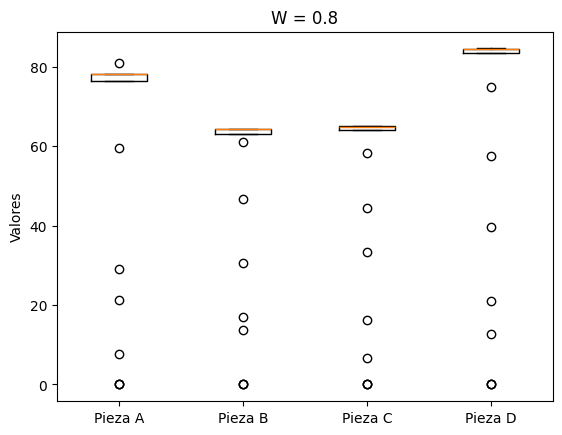

In [1729]:
# Grafico de pieza A
data =[w_08_A, w_08_B, w_08_C, w_08_D] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2, 3, 4], ['Pieza A', 'Pieza B', 'Pieza C', 'Pieza D'])
plt.ylabel('Valores')
plt.title('W = 0.8')

# Mostrar el gráfico
plt.show()

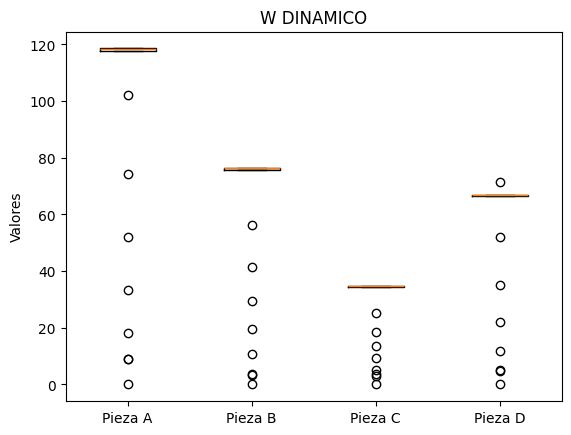

In [1730]:
# Grafico de pieza A
data =[w_DINAMICO_A, w_DINAMICO_B, w_DINAMICO_C, w_DINAMICO_D] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2, 3, 4], ['Pieza A', 'Pieza B', 'Pieza C', 'Pieza D'])
plt.ylabel('Valores')
plt.title('W DINAMICO')

# Mostrar el gráfico
plt.show()

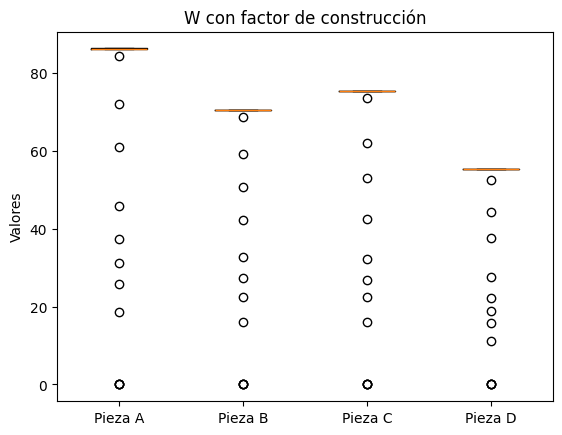

In [1731]:
# Grafico de pieza A
data =[w_fc_A, w_fc_B, w_fc_C, w_fc_D] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2, 3, 4], ['Pieza A', 'Pieza B', 'Pieza C', 'Pieza D'])
plt.ylabel('Valores')
plt.title('W con factor de construcción')

# Mostrar el gráfico
plt.show()

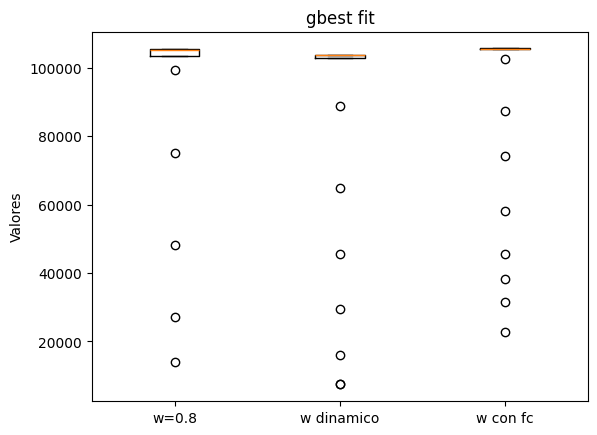

In [1733]:
# Grafico del gbest_fit
data =[w_08_fit, w_DINAMICO_fit, w_fc_fit] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2, 3], ['w=0.8', 'w dinamico', 'w con fc'])
plt.ylabel('Valores')
plt.title('gbest fit')

# Mostrar el gráfico
plt.show()